In [32]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('diputados.csv')

In [7]:
df.head()

,Apellido,Nombre,Distrito,IniciaMandato,FinalizaMandato,Bloque,Leyenda
0,Acevedo,Sergio Edgardo,SANTA CRUZ,07/12/2023,09/12/2025,POR SANTA CRUZ,NaN
1,Agost Carreño,Oscar,CORDOBA,23/08/2023,09/12/2025,HACEMOS COALICIÓN FEDERAL,NaN
2,Aguirre,Hilda,LA RIOJA,10/12/2023,09/12/2027,UNIÓN POR LA PATRIA,NaN
3,Aguirre,Manuel Ignacio,CORRIENTES,10/12/2021,09/12/2025,UCR - UNIÓN CÍVICA RADICAL,NaN
4,Ajmechet,Sabrina,CIUDAD DE BUENOS AIRES,10/12/2021,09/12/2025,PRO,NaN


In [48]:
df.loc[(df['Bloque'] == 'UNIÓN POR LA PATRIA') & (df['Distrito'] == 'CIUDAD DE BUENOS AIRES')]

,Apellido,Nombre,Distrito,IniciaMandato,FinalizaMandato,Bloque,Leyenda,es_k
115,Hagman,Itai,CIUDAD DE BUENOS AIRES,10/12/2023,09/12/2027,UNIÓN POR LA PATRIA,NaN,1
116,Heller,Carlos,CIUDAD DE BUENOS AIRES,10/12/2021,09/12/2025,UNIÓN POR LA PATRIA,NaN,1
149,Marziotta,Gisela,CIUDAD DE BUENOS AIRES,10/12/2021,09/12/2025,UNIÓN POR LA PATRIA,NaN,1
189,Penacca,Paula Andrea,CIUDAD DE BUENOS AIRES,10/12/2023,09/12/2027,UNIÓN POR LA PATRIA,NaN,1
195,Pokoik,Lorena,CIUDAD DE BUENOS AIRES,10/12/2023,09/12/2027,UNIÓN POR LA PATRIA,NaN,1
217,Santoro,Leandro,CIUDAD DE BUENOS AIRES,10/12/2021,09/12/2025,UNIÓN POR LA PATRIA,NaN,1
237,Valdés,Eduardo Félix,CIUDAD DE BUENOS AIRES,10/12/2023,09/12/2027,UNIÓN POR LA PATRIA,NaN,1


In [81]:
df.groupby(['Distrito', 'Bloque'])[['es_k']].count().sort_values('es_k', ascending=False).head(20)

es_k
Distrito               Bloque                          
BUENOS AIRES           UNIÓN POR LA PATRIA           31
                       PRO                           11
                       HACEMOS COALICIÓN FEDERAL      9
                       LA LIBERTAD AVANZA             8
CIUDAD DE BUENOS AIRES PRO                            7
                       UNIÓN POR LA PATRIA            7
SANTIAGO DEL ESTERO    UNIÓN POR LA PATRIA            7
SANTA FE               PRO                            6
                       UNIÓN POR LA PATRIA            6
CORDOBA                HACEMOS COALICIÓN FEDERAL      6
BUENOS AIRES           UCR - UNIÓN CÍVICA RADICAL     5
ENTRE RIOS             UNIÓN POR LA PATRIA            4
CATAMARCA              UNIÓN POR LA PATRIA            4
LA RIOJA               UNIÓN POR LA PATRIA            4
MISIONES               INNOVACIÓN FEDERAL             4
CIUDAD DE BUENOS AIRES LA LIBERTAD AVANZA             4
CORDOBA                UCR - UNIÓN CÍVICA RADICAL     4
SANTA FE               LA LIBERTAD AVANZA             3
CORDOBA                LA LIBERTAD AVANZA             3
MENDOZA                LA LIBERTAD AVANZA             3

In [9]:
df[['Distrito', 'Bloque']].groupby('Bloque').count().sort_values('Distrito', ascending=False)

,Distrito
Bloque,
UNIÓN POR LA PATRIA,99
LA LIBERTAD AVANZA,38
PRO,37
UCR - UNIÓN CÍVICA RADICAL,34
HACEMOS COALICIÓN FEDERAL,23
INNOVACIÓN FEDERAL,9
FRENTE DE IZQUIERDA Y DE TRABAJADORES UNIDAD,5
INDEPENDENCIA,3
BUENOS AIRES LIBRE,2


In [10]:
df[['Distrito', 'Bloque']].groupby('Distrito').count().sort_values('Bloque', ascending=False)

,Bloque
Distrito,
BUENOS AIRES,70
CIUDAD DE BUENOS AIRES,25
SANTA FE,19
CORDOBA,18
MENDOZA,10
TUCUMAN,9
ENTRE RIOS,9
SANTIAGO DEL ESTERO,7
CHACO,7


In [11]:
union_por_la_patria = df.loc[df['Bloque'] == 'UNIÓN POR LA PATRIA']
resto_de_bloques = df.loc[df['Bloque'] != 'UNIÓN POR LA PATRIA']

In [12]:
resto_de_bloques_agrupados = resto_de_bloques[['Distrito', 'Bloque']].groupby('Bloque').count().sort_values('Distrito', ascending=False)

In [17]:
df['es_k'] = df['Bloque'].apply(lambda x: 1 if x == 'UNIÓN POR LA PATRIA' else 0)

In [19]:
df[['Distrito', 'es_k']].groupby('es_k').count().sort_values('Distrito', ascending=False)

,Distrito
es_k,
0,158
1,99


Text(0, 0.5, '')

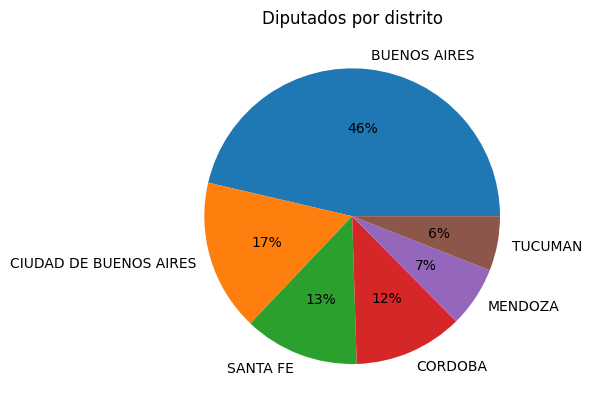

In [33]:
df[['Distrito', 'Bloque']].groupby('Distrito').count().sort_values('Bloque', ascending=False).head(6).plot(kind='pie', y='Bloque', autopct='%1.0f%%', title='Diputados por distrito', legend=False)
plt.ylabel(None)

In [36]:
df[['Distrito', 'es_k']].groupby('Distrito').count().sort_values('es_k', ascending=False).head(6)

,es_k
Distrito,
BUENOS AIRES,70
CIUDAD DE BUENOS AIRES,25
SANTA FE,19
CORDOBA,18
MENDOZA,10
TUCUMAN,9


In [41]:
list(df.columns)

['Apellido',
 'Nombre',
 'Distrito',
 'IniciaMandato',
 'FinalizaMandato',
 'Bloque',
 'Leyenda',
 'es_k']

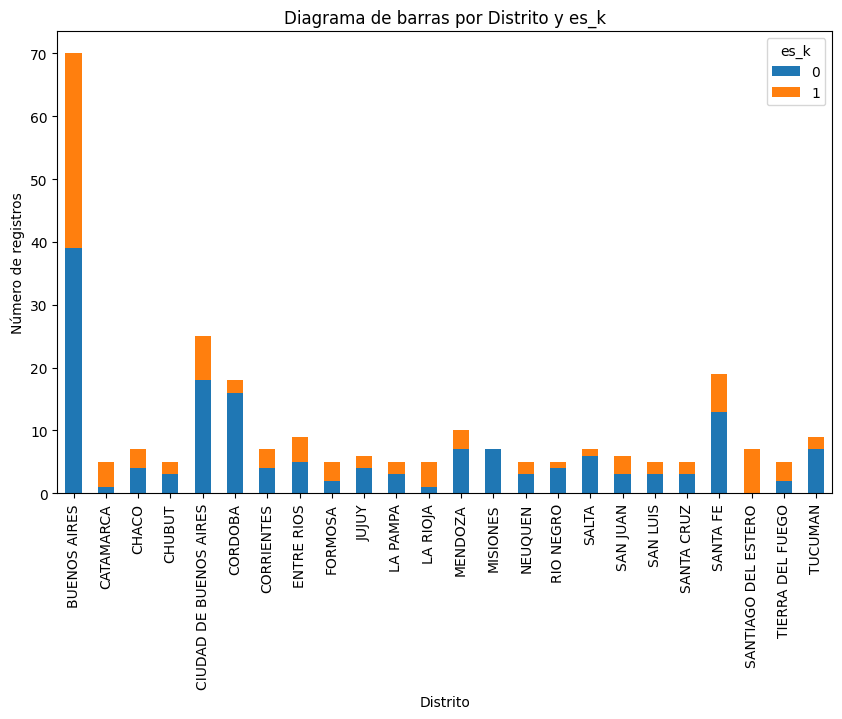

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tu DataFrame se llama df
# df = ...

# Agrupa los datos por Distrito y es_k y cuenta el número de registros
grouped_data = df.groupby(['Distrito', 'es_k']).size().unstack()

# Graficar el diagrama de barras
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Personalizar el gráfico
ax.set_title('Diagrama de barras por Distrito y es_k')
ax.set_xlabel('Distrito')
ax.set_ylabel('Número de registros')
plt.legend(title='es_k')

# Mostrar el gráfico
plt.show()

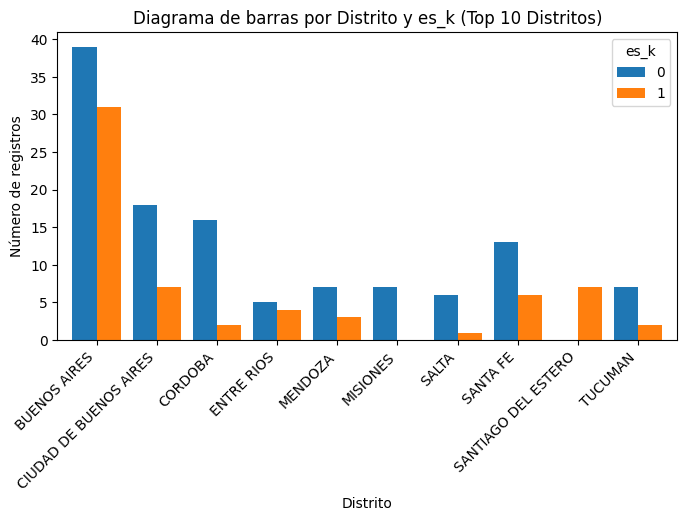

In [46]:

# Filtra los primeros 10 distritos
top_10_distritos = df['Distrito'].value_counts().head(10).index
df_top_10 = df[df['Distrito'].isin(top_10_distritos)]

# Graficar el diagrama de barras agrupadas
grouped_data = df_top_10.groupby(['Distrito', 'es_k']).size().unstack()
ax = grouped_data.plot(kind='bar', figsize=(8, 4), width=0.8)

# Personalizar el gráfico
ax.set_title('Diagrama de barras por Distrito y es_k (Top 10 Distritos)')
ax.set_xlabel('Distrito')
ax.set_ylabel('Número de registros')
plt.legend(title='es_k')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
# Mostrar el gráfico
plt.show()


In [82]:
grouped_data

es_k,0,1
Distrito,,
BUENOS AIRES,39.0,31.0
CIUDAD DE BUENOS AIRES,18.0,7.0
CORDOBA,16.0,2.0
ENTRE RIOS,5.0,4.0
MENDOZA,7.0,3.0
MISIONES,7.0,NaN
SALTA,6.0,1.0
SANTA FE,13.0,6.0
SANTIAGO DEL ESTERO,NaN,7.0


In [87]:
df_top_10.groupby(['Distrito', 'es_k']).size()

Distrito                es_k
BUENOS AIRES            0       39
                        1       31
CIUDAD DE BUENOS AIRES  0       18
                        1        7
CORDOBA                 0       16
                        1        2
ENTRE RIOS              0        5
                        1        4
MENDOZA                 0        7
                        1        3
MISIONES                0        7
SALTA                   0        6
                        1        1
SANTA FE                0       13
                        1        6
SANTIAGO DEL ESTERO     1        7
TUCUMAN                 0        7
                        1        2
dtype: int64